In [3]:
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [4]:
NUM_DATASETS = 50
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
Ntrain = int(0.9*N)


In [5]:
def make_poly(x, D):
  N = len(x)
  X = np.empty((N, D+1))
  for d in range(D+1):
    X[:,d] = x**d
    if d > 1:
      X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
  return X

In [6]:
def f(X):
  return np.sin(X)

In [7]:
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

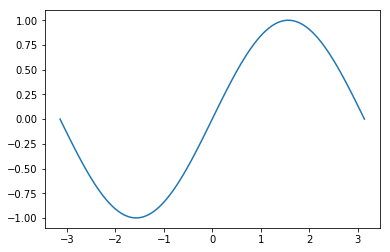

In [10]:
plt.plot(x_axis, y_axis)
plt.show()

In [11]:
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

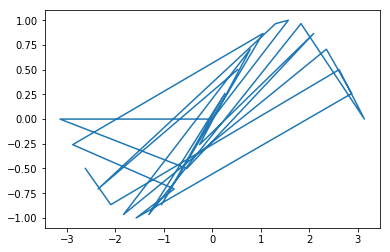

In [12]:
plt.plot(X, f_X)
plt.show()

In [14]:
X

array([ 0.52359878, -2.35619449,  1.30899694,  1.57079633,  0.        ,
       -3.14159265, -0.52359878,  2.0943951 , -0.26179939,  0.78539816,
       -1.83259571,  2.35619449,  2.87979327, -1.57079633, -0.78539816,
       -2.87979327,  1.04719755, -1.04719755,  0.26179939, -1.30899694,
        1.83259571,  3.14159265,  2.61799388, -2.0943951 , -2.61799388])

In [16]:
Xpoly = make_poly(X, MAX_POLY)

In [18]:
Xpoly

array([[ 1.00000000e+00,  5.23598776e-01, -1.03452120e+00,
         1.08979689e-02, -7.52551709e-01,  3.52917865e-04,
        -6.08771063e-01,  1.06913264e-05, -5.26596432e-01,
         3.13441796e-07, -4.73096823e-01,  9.01912650e-09,
        -4.35410373e-01],
       [ 1.00000000e+00, -2.35619449e+00,  6.25023225e-01,
        -9.93077420e-01,  2.64935263e-01, -6.51232719e-01,
        -8.40035644e-03, -3.99502210e-01, -1.77670987e-01,
        -2.37175340e-01, -2.72454576e-01, -1.38198116e-01,
        -3.20884651e-01],
       [ 1.00000000e+00,  1.30899694e+00, -5.81918175e-01,
         1.70280765e-01, -6.57876451e-01,  3.44646353e-02,
        -5.91189631e-01,  6.52546779e-03, -5.23432184e-01,
         1.19568556e-03, -4.72534932e-01,  2.15032729e-04,
        -4.35311375e-01],
       [ 1.00000000e+00,  1.57079633e+00, -3.44840400e-01,
         2.94245162e-01, -5.53562660e-01,  8.57590412e-02,
        -5.56129582e-01,  2.33819309e-02, -5.12983899e-01,
         6.16947487e-03, -4.69617437e

In [19]:
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

In [20]:
model = LinearRegression()


In [21]:
for k in range(NUM_DATASETS):
  Y = f_X + np.random.randn(N)*NOISE_VARIANCE

  Xtrain = Xpoly[:Ntrain]
  Ytrain = Y[:Ntrain]

  Xtest = Xpoly[Ntrain:]
  Ytest = Y[Ntrain:]

In [22]:
Ytest

array([ 0.95207296, -1.42142542, -1.08781659])

In [26]:
for d in range(MAX_POLY):
    model.fit(Xtrain[:,:d+2], Ytrain)
    predictions = model.predict(Xpoly[:,:d+2])

    # debug
    x_axis_poly = make_poly(x_axis, d+1)
    prediction_axis = model.predict(x_axis_poly)
    # plt.plot(x_axis, prediction_axis)
    # plt.show()

    prediction_curves[:,k,d] = prediction_axis

    train_prediction = predictions[:Ntrain]
    test_prediction = predictions[Ntrain:]

    train_predictions[:,k,d] = train_prediction # use this to calculate bias/variance later

    train_score = mse(train_prediction, Ytrain)
    test_score = mse(test_prediction, Ytest)

    train_scores[k,d] = train_score
    test_scores[k,d] = test_score
print(test_scores)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.

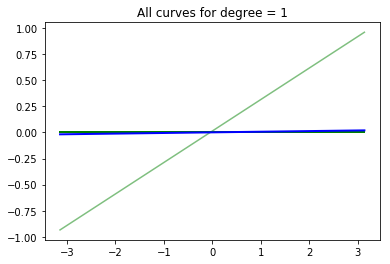

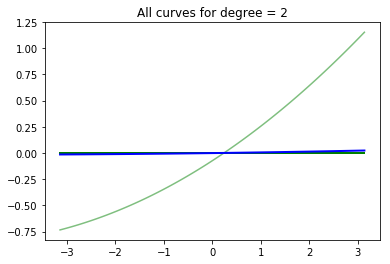

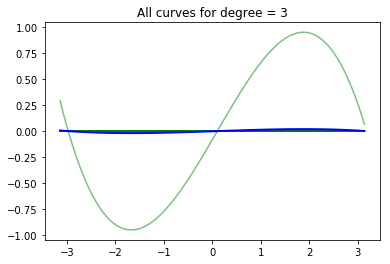

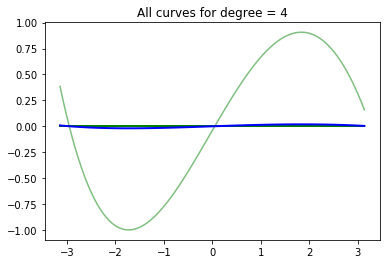

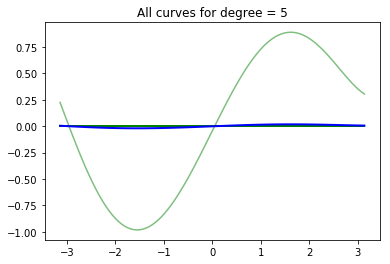

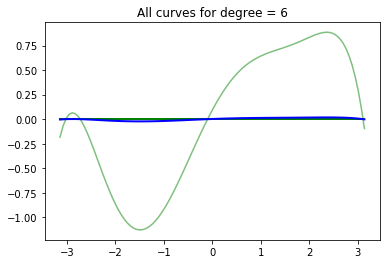

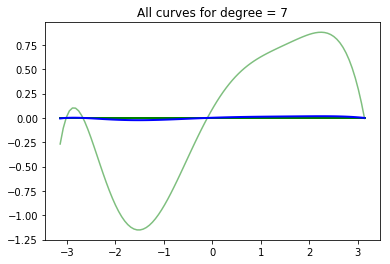

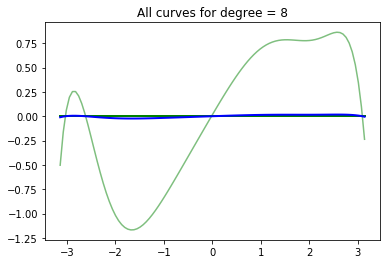

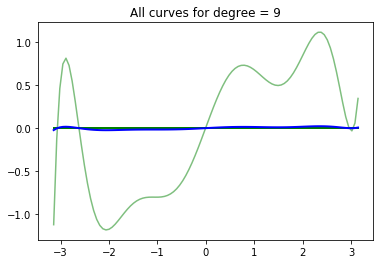

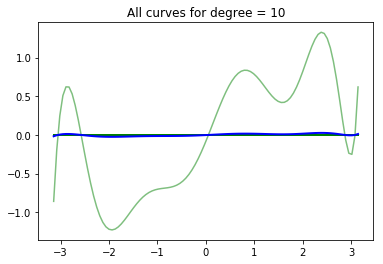

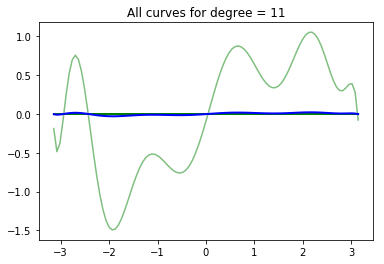

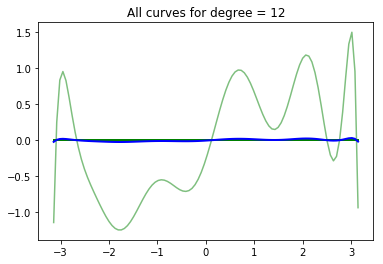

In [27]:
for d in range(MAX_POLY):
  for k in range(NUM_DATASETS):
    plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
  plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)
  plt.title("All curves for degree = %d" % (d+1))
  plt.show()

In [28]:
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
  for i in range(Ntrain):
    avg_train_prediction[i,d] = train_predictions[i,:,d].mean()
  squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()

In [29]:
squared_bias

array([0.47809919, 0.47808547, 0.46975542, 0.46974687, 0.46957505,
       0.4695822 , 0.46958716, 0.46958912, 0.46960475, 0.46960746,
       0.46961467, 0.46961913])

In [30]:
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
  for i in range(Ntrain):
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / N
variance = variances.mean(axis=0)
variance

array([0.01149879, 0.01179667, 0.01895871, 0.01901336, 0.01915688,
       0.01983694, 0.01986029, 0.02004974, 0.02172918, 0.02199553,
       0.02270282, 0.02314026])

In [42]:
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
degrees

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [39]:
test_scores.mean(axis=0)

array([0.00510485, 0.00582454, 0.00323613, 0.00271314, 0.00433669,
       0.00652253, 0.00675129, 0.0062557 , 0.00340814, 0.0056578 ,
       0.01198637, 0.0076673 ])

In [41]:
#np.argmin - Returns the indices of the minimum values along an axis.


In [36]:
best_degree

4

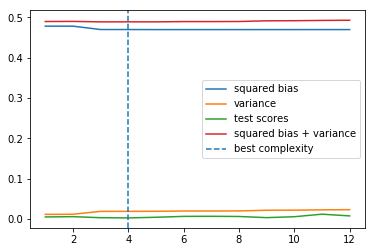

In [33]:
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

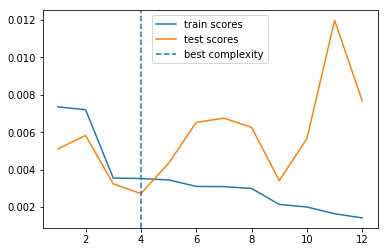

In [32]:
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()